MovieWriter imagemagick unavailable; using Pillow instead.


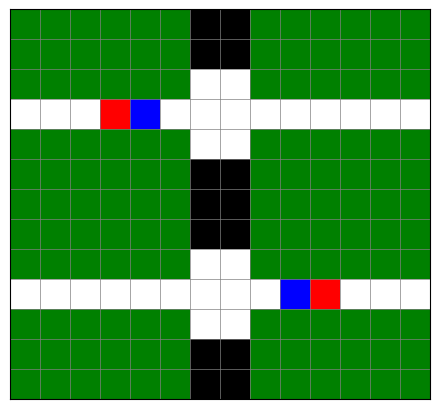

In [5]:
import cellpylib as cpl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def wireworld_rule(n, c, t):
    current_activity = n[1][1]
    if current_activity == 0:  # empty
        return 0
    if current_activity == 1:  # electron head
        return 2
    if current_activity == 2:  # electron tail
        return 3
    if current_activity == 3:  # conductor
        electron_head_count = np.count_nonzero(n == 1)
        return 1 if electron_head_count == 1 or electron_head_count == 2 else 3
    if current_activity == 4:  # empty
        return 4


cellular_automata = np.array([[
    [0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0],
    [2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
    [0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0],
    [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2],
    [0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0]
]])

cellular_automata = cpl.evolve2d(cellular_automata, timesteps=15,
                                 apply_rule=wireworld_rule, neighbourhood="Moore")

cpl.plot2d_animate(cellular_automata, show_grid=True, show_margin=False, scale=0.3, save=True,
                   colormap=ListedColormap(["green", "blue", "red", "white", "black"]))